# The Sparks Foundation GRIP, NOV'21

# Name - Sonu

# Data Science and Business Analytics Task

## Prediction using Supervised Machine Learning
## Task 1 Statement-  Predict percentage of marks of a student based on the number of study hours.

### In this task we have to predict the percentage of a student based on the number of study hours. The task has two variable where feature variable is the no. of hours studied and the target variable is the percentage of marks.

## Dataset Link : http://bit.ly/w-data

## Importing Relevant Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Loading the dataset

In [26]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

In [27]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [28]:
dataset.shape

(25, 2)

# Checking for any null values

In [29]:
dataset.isnull()    # true denotes the null values and false denote non- null values

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [30]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Inspecting and Analysing Data

In [31]:
dataset.head()   # first five rows of the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [32]:
dataset.tail()   # last five rows of the dataset

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [34]:
dataset.describe()   # some descriptive statistics measures like mean, median, standard deviation etc.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualising the data

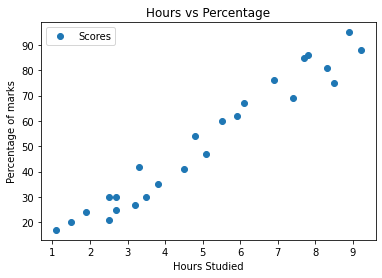

In [35]:
dataset.plot(x= 'Hours',y= 'Scores', style = 'o')
plt.title('Hours vs Percentage')               
plt.xlabel('Hours Studied')
plt.ylabel('Percentage of marks')
plt.show()

In [38]:
# above we see the positive relationship between the two variables. we can confirm this positive relationship by computing the correlation below :

In [37]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Data preprocessing

Divide the data set into features and labels.

In [39]:
X =dataset.iloc[:, :-1].values
y =dataset.iloc[:,1]

## Training the Model

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
reg = LinearRegression()
reg.fit(X_train.reshape(-1,1), y_train)
print("Model Training Complete.")

Model Training Complete.


## Plotting the line of regression

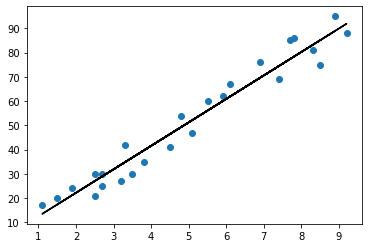

In [41]:
line = reg.coef_*X+reg.intercept_

# plotting for the test data
plt.scatter(X,y)
plt.plot(X,line,color='black');
plt.show()

In [42]:
# So here sklearn helps us to get a line in which the difference of the predicted value of the line and actual values of the point is minimum 

# Making Predictions

In [43]:
y_pred = reg.predict(X_test)
print('predicted successfully')
y_pred

predicted successfully


array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

## Comparing Actual and Predicted Model Result

In [44]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


## Predicting the percentage based on no. of hours

In [45]:
percentage=reg.predict([[9.25]])

print("Percentage after studying for 9.25 hrs/day",percentage)

Percentage after studying for 9.25 hrs/day [92.38611528]


# Evaluating the algorithm

In [46]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('R2 Score' , r2_score(y_test,y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
R2 Score 0.9678055545167994


In [47]:
# Finally we do the model evolution for this and we get  the mean absolute error as 3.9207, mean squared error as 18.943  and R2 score as 0.9678 .